In [ ]:
#Edgar Moises Hernandez-Gonzalez
#06/11/19-11/11/19
#Clasificar RAW con MLP

In [1]:
import numpy as np #se utiliza para calcular el numero de clases
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#modelo
model = Sequential()
model.add(Dense(64, input_shape=(22000,), activation='relu')) #neuronas ocultas, variables entrada
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408064   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 1,408,324
Trainable params: 1,408,324
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/100
288/288 [==============================] - 1s 3ms/sample - loss: 6.3804 - acc: 0.2743 - val_loss: 7.3023 - val_acc: 0.3056
Epoch 2/100
288/288 [==============================] - 0s 2ms/sample - loss: 3.9588 - acc: 0.6736 - val_loss: 7.9732 - val_acc: 0.2951
Epoch 3/100
288/288 [==============================] - 0s 1ms/sample - loss: 3.2171 - acc: 0.7188 - val_loss: 8.6412 - val_acc: 0.3125
Epoch 4/100
288/288 [==============================] - 0s 1ms/sample - loss: 2.6295 - acc: 0.7882 - val_loss: 9.1981 - val_acc: 0.2500
Epoch 5/100
288/288 [==============================] - 0s 2ms/sample - loss: 2.4484 - acc: 0.7917 - val_loss: 9.3762 - val_acc: 0.2535
Epoch 6/100
288/288 [==============================] - 0s 2ms/sample - loss: 2.1065 - acc: 0.8299 - val_loss: 9.6351 - val_acc: 0.2674
Epoch 7/100
288/288 [==============================] - 0s 1ms/sample - loss: 1.9229 - acc: 0.8403 - val_loss: 9.3424 - val_acc: 0.2951
Epoch 8/1

Epoch 61/100
288/288 [==============================] - 1s 2ms/sample - loss: 0.5934 - acc: 0.9549 - val_loss: 10.7970 - val_acc: 0.2778
Epoch 62/100
288/288 [==============================] - 0s 2ms/sample - loss: 0.4675 - acc: 0.9618 - val_loss: 10.6436 - val_acc: 0.2778
Epoch 63/100
288/288 [==============================] - 1s 2ms/sample - loss: 0.4750 - acc: 0.9688 - val_loss: 10.4722 - val_acc: 0.2847
Epoch 64/100
288/288 [==============================] - 1s 2ms/sample - loss: 0.6529 - acc: 0.9444 - val_loss: 10.4727 - val_acc: 0.2951
Epoch 65/100
288/288 [==============================] - 1s 2ms/sample - loss: 0.5205 - acc: 0.9583 - val_loss: 10.3008 - val_acc: 0.2986
Epoch 66/100
288/288 [==============================] - 1s 2ms/sample - loss: 0.5008 - acc: 0.9618 - val_loss: 10.2552 - val_acc: 0.3056
Epoch 67/100
288/288 [==============================] - 1s 2ms/sample - loss: 0.6083 - acc: 0.9514 - val_loss: 10.4266 - val_acc: 0.3056
Epoch 68/100
288/288 [===================

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 511us/sample - loss: 10.9187 - acc: 0.2639
Test loss: 10.918713251749674
Test accuracy: 0.2638889


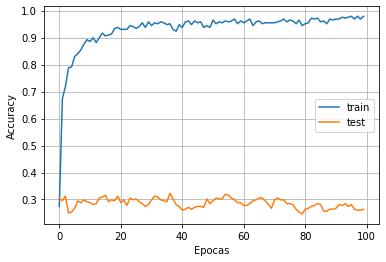

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

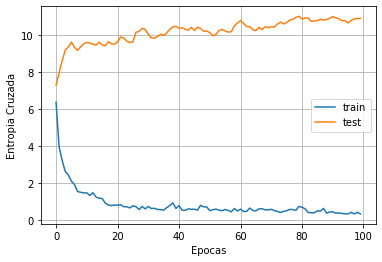

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [15]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [16]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.01851851851851849


In [17]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[16 19 21 16]
 [23 14 12 23]
 [22  8 26 16]
 [23 14 15 20]]


In [18]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.19      0.22      0.21        72
           1       0.25      0.19      0.22        72
           2       0.35      0.36      0.36        72
           3       0.27      0.28      0.27        72

   micro avg       0.26      0.26      0.26       288
   macro avg       0.27      0.26      0.26       288
weighted avg       0.27      0.26      0.26       288

